# Image classification with TensorFlow Lite Model Maker


Follows the example
and then adapts it to Wes or not Wes.



https://www.tensorflow.org/lite/models/modify/model_maker/image_classification

data structure 

```
data/ 
    not_wes/
        img.jpg
    wes/
        img.jpg
```

In [1]:
import os

import numpy as np

import tensorflow as tf

assert tf.__version__.startswith("2")

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

%load_ext nb_black

<IPython.core.display.Javascript object>

```
flower_photos
|__ daisy
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ dandelion
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ roses
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ sunflowers
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ tulips
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
```

In [2]:
image_path = tf.keras.utils.get_file(
    "flower_photos.tgz",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    extract=True,
)
image_path = os.path.join(os.path.dirname(image_path), "flower_photos")

<IPython.core.display.Javascript object>

In [3]:
image_path

'/Users/rory/.keras/datasets/flower_photos'

<IPython.core.display.Javascript object>

In [4]:
!ls /Users/rory/.keras/datasets/flower_photos

LICENSE.txt daisy       dandelion   roses       sunflowers  tulips


<IPython.core.display.Javascript object>

In [5]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3671, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


<IPython.core.display.Javascript object>

In [6]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/Users/rory/anaconda3/envs/new_wes/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


103/103 [==============================] - 59s 553ms/step - loss: 0.8456 - accuracy: 0.7855
Epoch 2/5
103/103 [==============================] - 56s 539ms/step - loss: 0.6572 - accuracy: 0.8938
Epoch 3/5
103/103 [==============================] - 57s 549ms/step - loss: 0.6177 - accuracy: 0.9163
Epoch 4/5
103/103 [==============================] - 56s 547ms/step - loss: 0.6033 - accuracy: 0.9211
Epoch 5/5
103/103 [==============================] - 61s 591ms/step - loss: 0.5940 - accuracy: 0.9314


<IPython.core.display.Javascript object>

In [7]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 8s 488ms/step - loss: 0.5992 - accuracy: 0.9212


<IPython.core.display.Javascript object>

In [8]:
# model.export(export_dir=".")

<IPython.core.display.Javascript object>

# Try with Wes Images

In [9]:
image_path = "/Users/rory/data/how_much_wes/wes_anderson/data/"

data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 2820, num_label: 2, labels: not_wes, wes.


INFO:tensorflow:Load image with size: 2820, num_label: 2, labels: not_wes, wes.


<IPython.core.display.Javascript object>

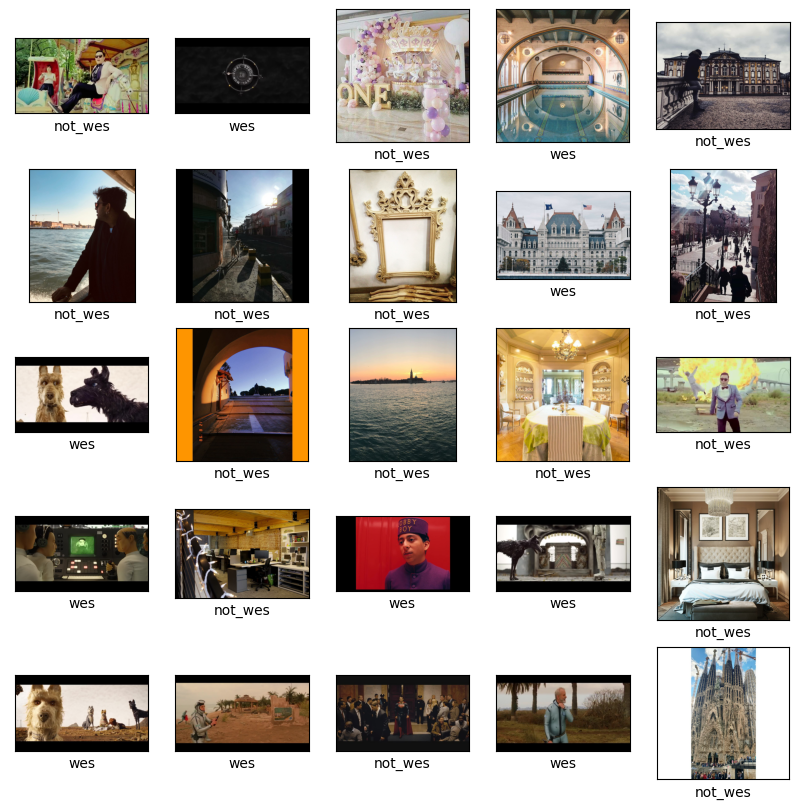

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.numpy(), cmap=plt.cm.gray)
    plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [11]:
# Identify problem images (or .DS_Store files)

from pathlib import Path
import imghdr


for filepath in Path(image_path).rglob("*"):
    if filepath.is_file():
        if not imghdr.what(filepath):
            print(filepath)

<IPython.core.display.Javascript object>

In [12]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
79/79 [==============================] - 55s 663ms/step - loss: 0.5466 - accuracy: 0.7512
Epoch 2/5
79/79 [==============================] - 55s 692ms/step - loss: 0.4014 - accuracy: 0.8813
Epoch 3/5
79/79 [================

<IPython.core.display.Javascript object>

In [13]:
loss, accuracy = model.evaluate(test_data)

9/9 [==============================] - 12s 571ms/step - loss: 0.3654 - accuracy: 0.8936


<IPython.core.display.Javascript object>

In [14]:
model.export(export_dir=".")

INFO:tensorflow:Assets written to: /var/folders/0p/62m163zd22d3w3186wq2wq6r0000gq/T/tmpk5wetjba/assets


INFO:tensorflow:Assets written to: /var/folders/0p/62m163zd22d3w3186wq2wq6r0000gq/T/tmpk5wetjba/assets
/Users/rory/anaconda3/envs/new_wes/lib/python3.8/site-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-03-08 15:54:31.762499: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-08 15:54:31.762518: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /var/folders/0p/62m163zd22d3w3186wq2wq6r0000gq/T/tmpygkff9qe/labels.txt


INFO:tensorflow:Saving labels in /var/folders/0p/62m163zd22d3w3186wq2wq6r0000gq/T/tmpygkff9qe/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


<IPython.core.display.Javascript object>

# Inference 

In [15]:
from tflite_support.task import vision
from tflite_support.task import core

classifier = vision.ImageClassifier.create_from_file("model.tflite")

<IPython.core.display.Javascript object>

In [16]:
# Run inference
image = vision.TensorImage.create_from_file(
    "/Users/rory/data/how_much_wes/wes_anderson/data/wes/accidentallywesanderson_18949937_679160838934445_2949582899495567360_n.jpg"
)
classification_result = classifier.classify(image)

<IPython.core.display.Javascript object>

In [17]:
classification_result.classifications[0].categories[0].score

0.93359375

<IPython.core.display.Javascript object>

In [18]:
classification_result.classifications

[Classifications(categories=[Category(index=1, score=0.93359375, display_name='', category_name='wes'), Category(index=0, score=0.06640625, display_name='', category_name='not_wes')], head_index=0, head_name='')]

<IPython.core.display.Javascript object>